# Marketing Campaign

From [Kaggle](https://www.kaggle.com/imakash3011/customer-personality-analysis/version/1)

Context
Problem Statement

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

Content
Attributes

People

- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise

Products

- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years

Promotion

- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

Place

- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from statsmodels.regression import linear_model 
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.eval_measures import rmse
from scipy import stats
from sklearn.metrics import r2_score
pd.set_option('display.max_columns', None)

In [2]:
# While loading file need to specify the separator as tab character or whitespace
df = pd.read_csv('data/marketing_campaign.csv', sep = '\t')

In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [4]:
df.shape

(2240, 29)

In [5]:
# Convert Dt_Customer to datetime object
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

We have 29 columns, most of them integer




Check for Null values

In [6]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [7]:
df[df['Income'].isna() == True]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,2013-11-15,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,2013-05-11,80,81,11,50,3,2,39,1,1,3,4,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,2014-01-01,96,48,5,48,6,10,7,3,2,1,4,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,2013-06-17,57,11,3,22,2,2,6,2,2,0,3,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,2012-09-14,25,25,3,43,17,4,17,3,3,0,3,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,2012-11-19,4,230,42,192,49,37,53,12,7,2,8,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,2014-05-27,45,7,0,8,2,0,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,2013-11-23,87,445,37,359,98,28,18,1,2,4,8,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,2013-11-07,23,352,0,27,10,0,15,3,6,1,7,6,0,0,0,0,0,0,3,11,0


Check for Duplicated rown

In [8]:
 df.dropna(inplace = True)

In [9]:
df.shape

(2216, 29)

In [10]:
df.T.duplicated().sum()

0

## Numeric Columns

Let's look at the statistic of the numerical columns

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2216.0,5588.353339,3249.376275,0.0,2814.75,5458.5,8421.75,11191.0
Year_Birth,2216.0,1968.820397,11.985554,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2216.0,0.441787,0.536896,0.0,0.00,0.0,1.00,2.0
Teenhome,2216.0,0.505415,0.544181,0.0,0.00,0.0,1.00,2.0
Recency,2216.0,49.012635,28.948352,0.0,24.00,49.0,74.00,99.0
MntWines,2216.0,305.091606,337.327920,0.0,24.00,174.5,505.00,1493.0
MntFruits,2216.0,26.356047,39.793917,0.0,2.00,8.0,33.00,199.0
MntMeatProducts,2216.0,166.995939,224.283273,0.0,16.00,68.0,232.25,1725.0
MntFishProducts,2216.0,37.637635,54.752082,0.0,3.00,12.0,50.00,259.0


In [12]:
df['age'] = 2017 - df['Year_Birth']
df.drop(columns=['Year_Birth'], inplace=True)

In [13]:
list_to_plot = df.select_dtypes(include=np.number).columns.tolist()

In [14]:
to_remove = ['ID', 'Z_CostContact']
for item in to_remove:
    list_to_plot.remove(item)

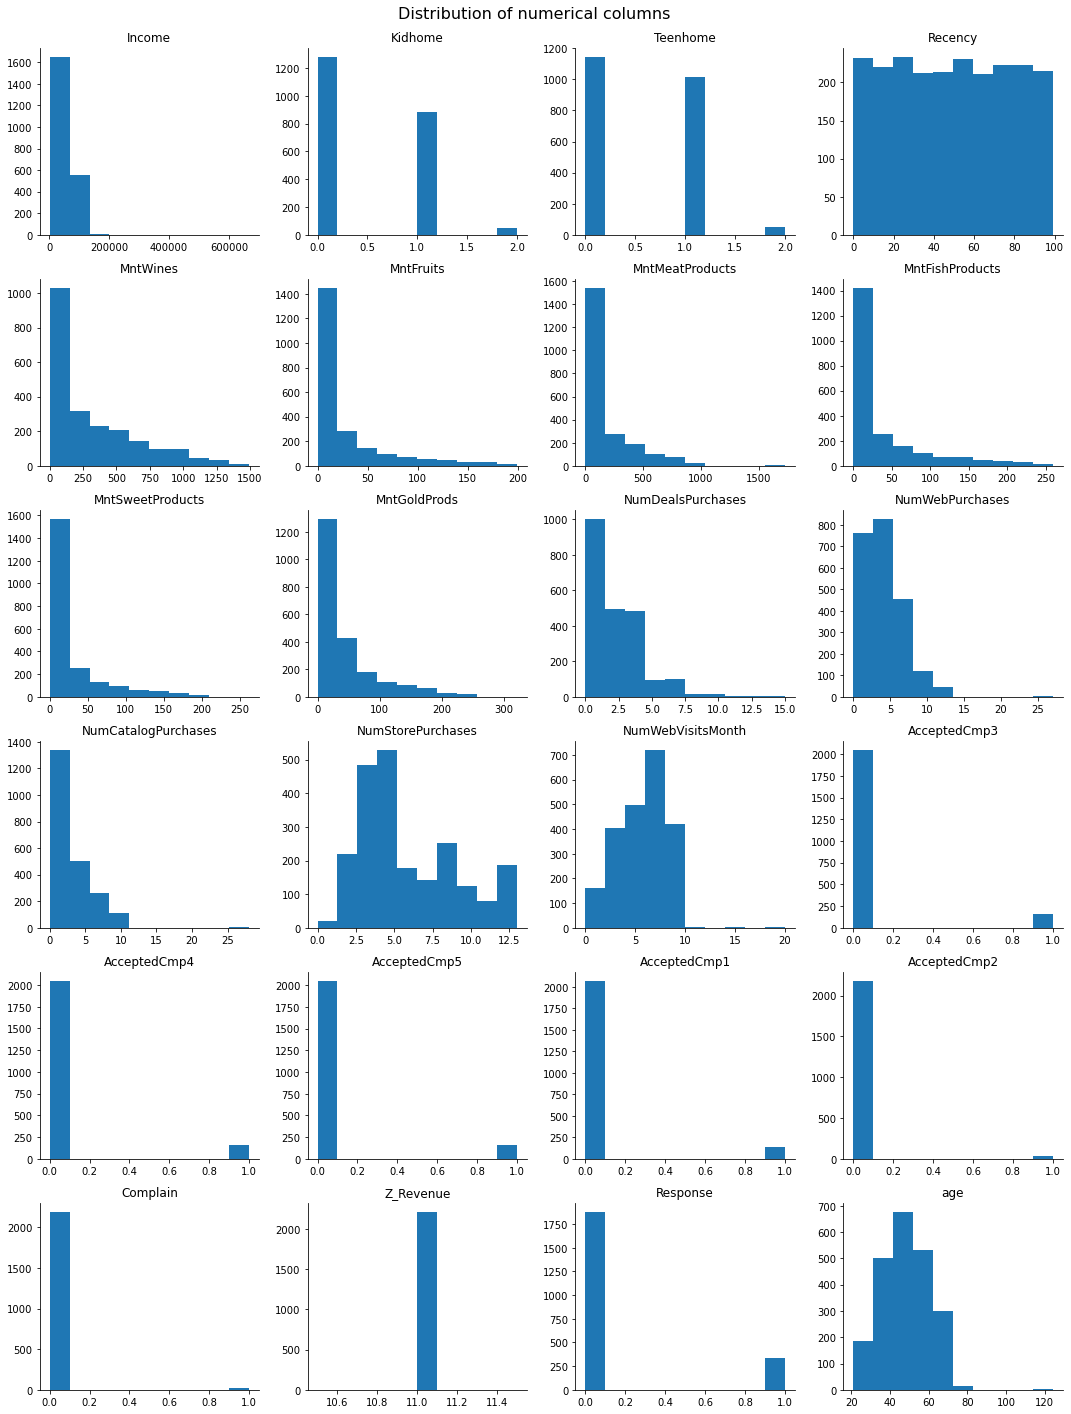

In [15]:
fig, axes = plt.subplots(6, 4, figsize=(15, 20))
axes = axes.flatten()
for idx, column in enumerate(list_to_plot):
    axes[idx].hist(df[column])
    axes[idx].set_title(column)
    sns.despine()
fig.suptitle('Distribution of numerical columns \n', fontsize=16)
plt.tight_layout()
plt.show()

In [16]:
to_remove = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_Revenue', 'Response']
for item in to_remove:
    list_to_plot.remove(item)

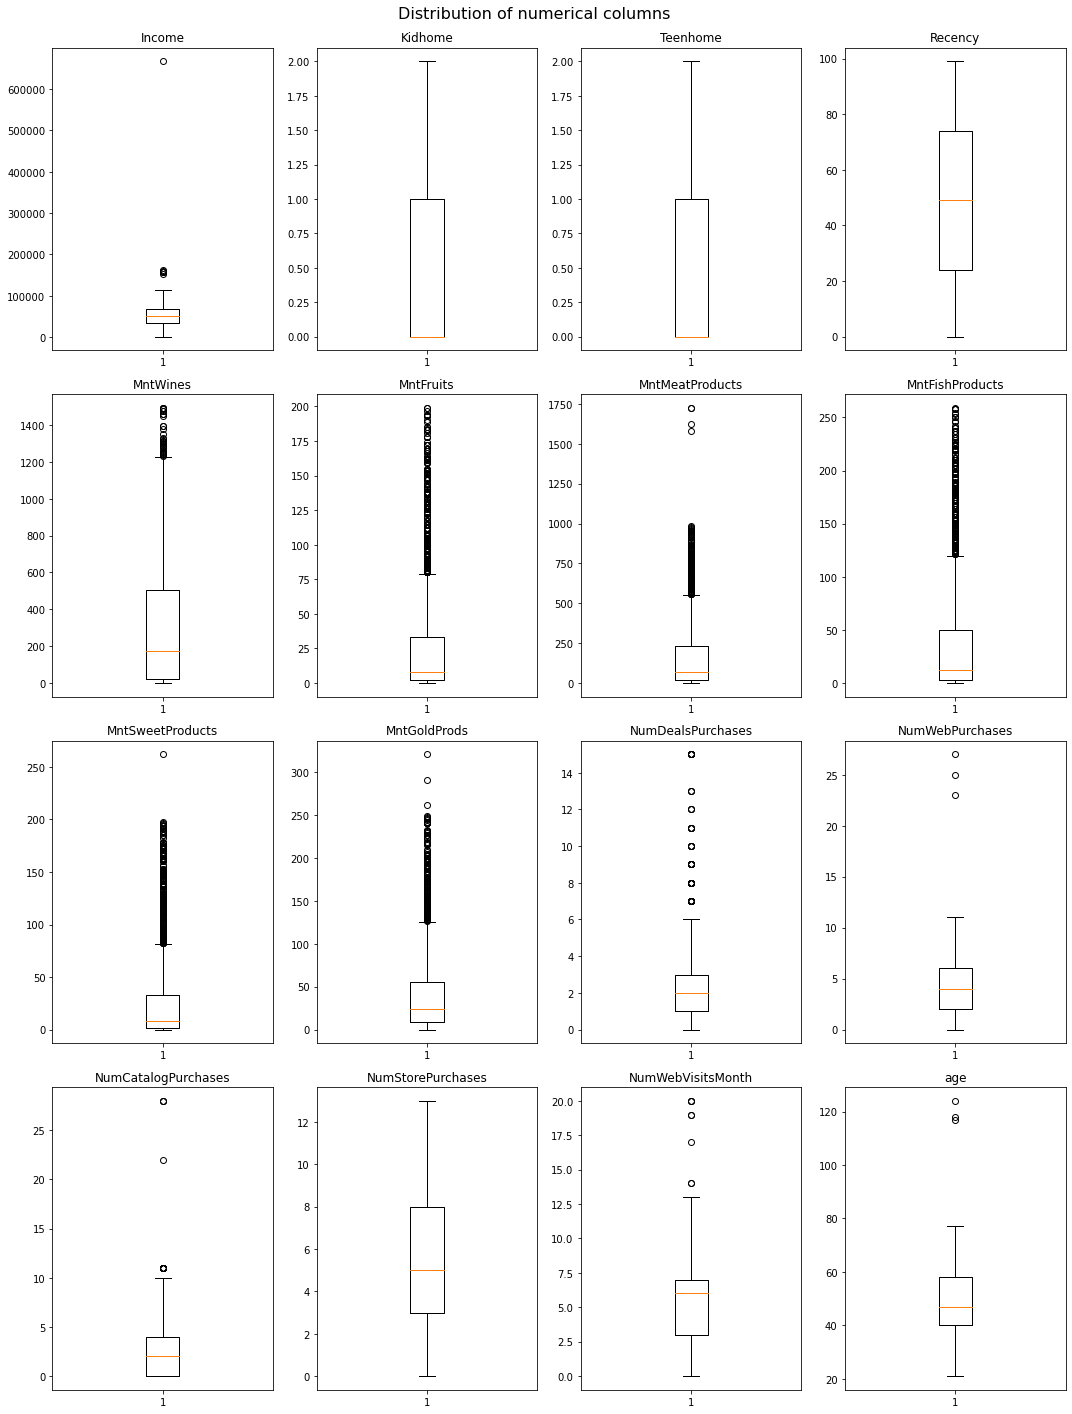

In [17]:
fig, axes = plt.subplots(4, 4, figsize=(15, 20))
axes = axes.flatten()
for idx, column in enumerate(list_to_plot):
    axes[idx].boxplot(df[column])
    axes[idx].set_title(column)
fig.suptitle('Distribution of numerical columns \n', fontsize=16)
plt.tight_layout()
plt.show()

Let's get tid of the otliers

In [18]:
for column in list_to_plot:
    if column == 'Kidhome' or column == 'Teenhome' or column == 'NumDealsPurchases': 
        continue
    df = df[df[column] < df[column].quantile(0.95)]

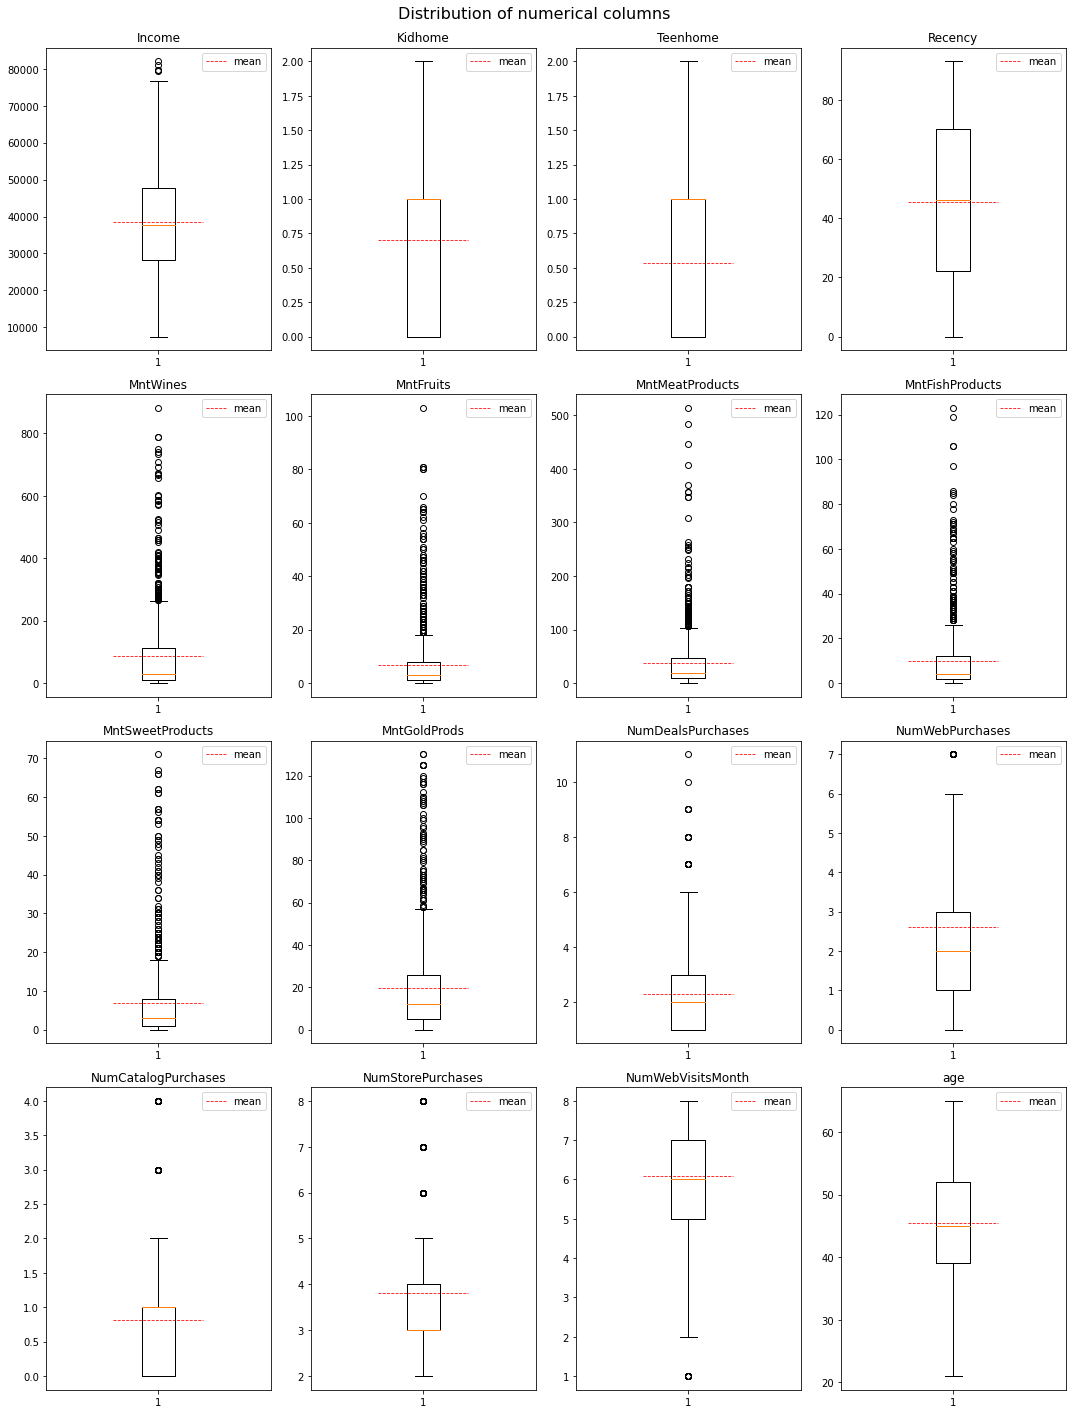

In [19]:
fig, axes = plt.subplots(4, 4, figsize=(15, 20))
axes = axes.flatten()
for idx, column in enumerate(list_to_plot):
    axes[idx].boxplot(df[column])
    axes[idx].hlines(y=df[column].mean(), xmin=0.8, xmax=1.2, color='r', linestyle='dashed', linewidth=0.8, label='mean')
    axes[idx].set_title(column)
    axes[idx].legend()
fig.suptitle('Distribution of numerical columns \n', fontsize=16)
plt.tight_layout()
plt.show()

## Categorical columns

In [20]:
df.drop(index=df[df['Marital_Status'] == 'YOLO'].index, inplace=True)

In [21]:
df['Education'] = np.where(df['Education'] == '2n Cycle', 'Master', df['Education'])
df['Marital_Status'] = np.where(df['Marital_Status'] == 'Together', 'Married', df['Marital_Status'])
df['Marital_Status'] = np.where(df['Marital_Status'] == 'Alone', 'Single', df['Marital_Status'])

In [22]:
categorical_columns = df.select_dtypes(include="object_").columns.tolist()

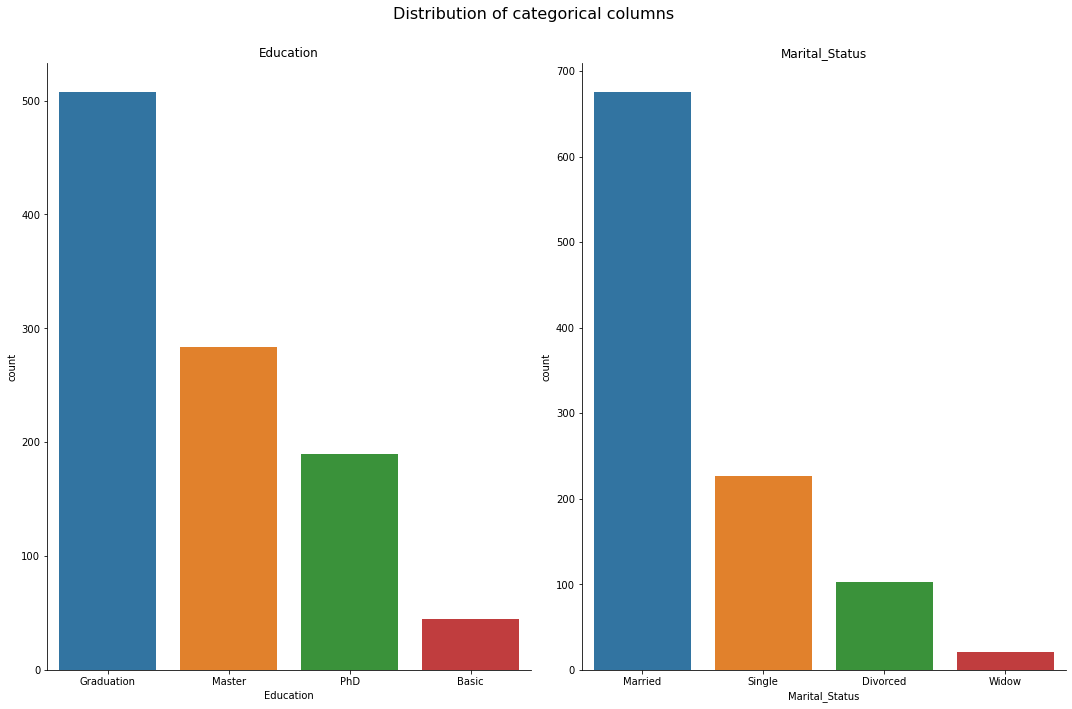

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(15, 10))
axes = axes.flatten()
for idx, column in enumerate(categorical_columns):
    #axes[idx].bar(x=df[column].value_counts().index, height=df[column].value_counts())
    sns.countplot(ax=axes[idx], x=column, data=df, order=df[column].value_counts().index)
    axes[idx].set_title(column)
    sns.despine()
fig.suptitle('Distribution of categorical columns \n', fontsize=16)
plt.tight_layout()
plt.show()

Let's now try to get some insights from this categories

In [24]:
categories_for_insight = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response']

In [25]:
serie = pd.Series(index=df['Dt_Customer'], dtype='int')
temp = serie.resample('M').count()

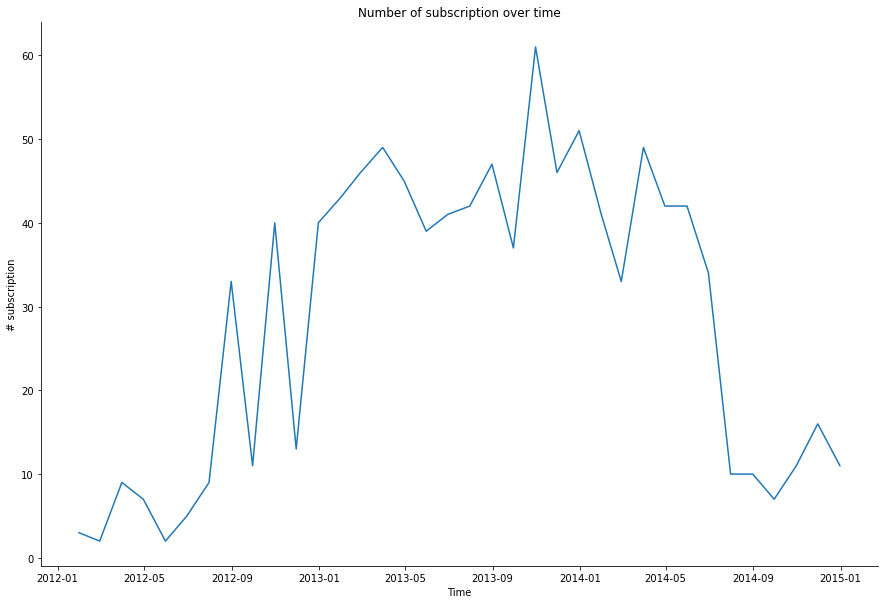

In [26]:
plt.figure(figsize=(15, 10))
plt.plot(temp)
plt.title('Number of subscription over time')
plt.xlabel('Time')
plt.ylabel('# subscription')
sns.despine()
plt.show()

In [27]:
df.columns

Index(['ID', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'age'],
      dtype='object')

Let's do some simple feature engineering on the datetime column and extract month and year.

In [28]:
df['Dt_MONTH'] = df['Dt_Customer'].dt.month
df['Dt_YEAR'] = df['Dt_Customer'].dt.year
df.drop(columns=['ID', 'Dt_Customer'], axis=1, inplace=True)

In [29]:
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age,Dt_MONTH,Dt_YEAR
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,63,8,2014
3,Graduation,Married,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,33,10,2014
6,Graduation,Divorced,55635.0,0,1,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0,46,11,2012
7,PhD,Married,33454.0,1,0,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0,32,8,2013
11,Basic,Married,7500.0,0,0,59,6,16,11,11,1,16,1,2,0,3,8,0,0,0,0,0,0,3,11,0,41,11,2012


In [30]:
column_average = ['Income', 'Recency', 'MntWines', 'MntFruits', 
                   'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

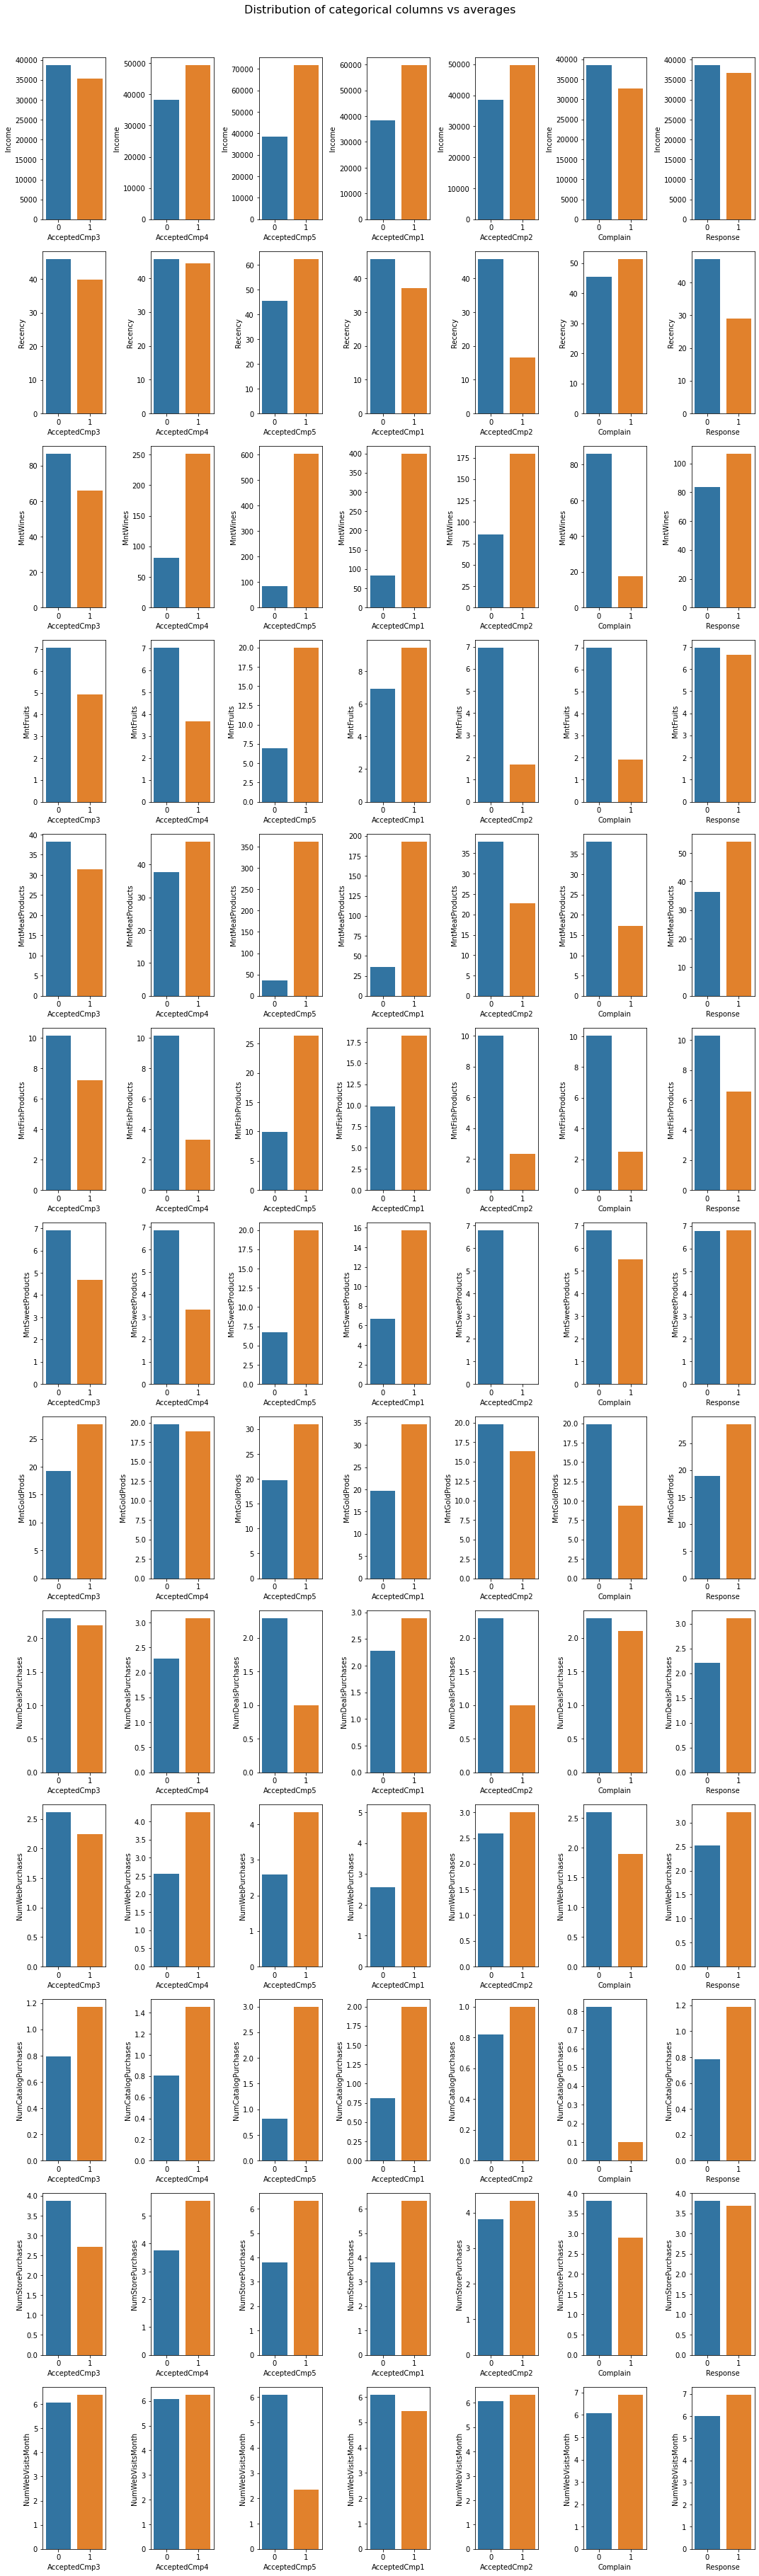

In [31]:
fig, axes = plt.subplots(13, 7, figsize=(15, 50))
for i, column in enumerate(column_average):
    for j, insight in enumerate(categories_for_insight):
        sns.barplot(ax=axes[i][j], y=df.groupby([insight])[column].mean(), x=df.groupby([insight])[column].mean().index)
fig.suptitle('Distribution of categorical columns vs averages', fontsize=16, y=1.01)
plt.tight_layout()
plt.show()

In [32]:
column_cat = ['Education', 'Marital_Status','Dt_MONTH', 'Dt_YEAR']

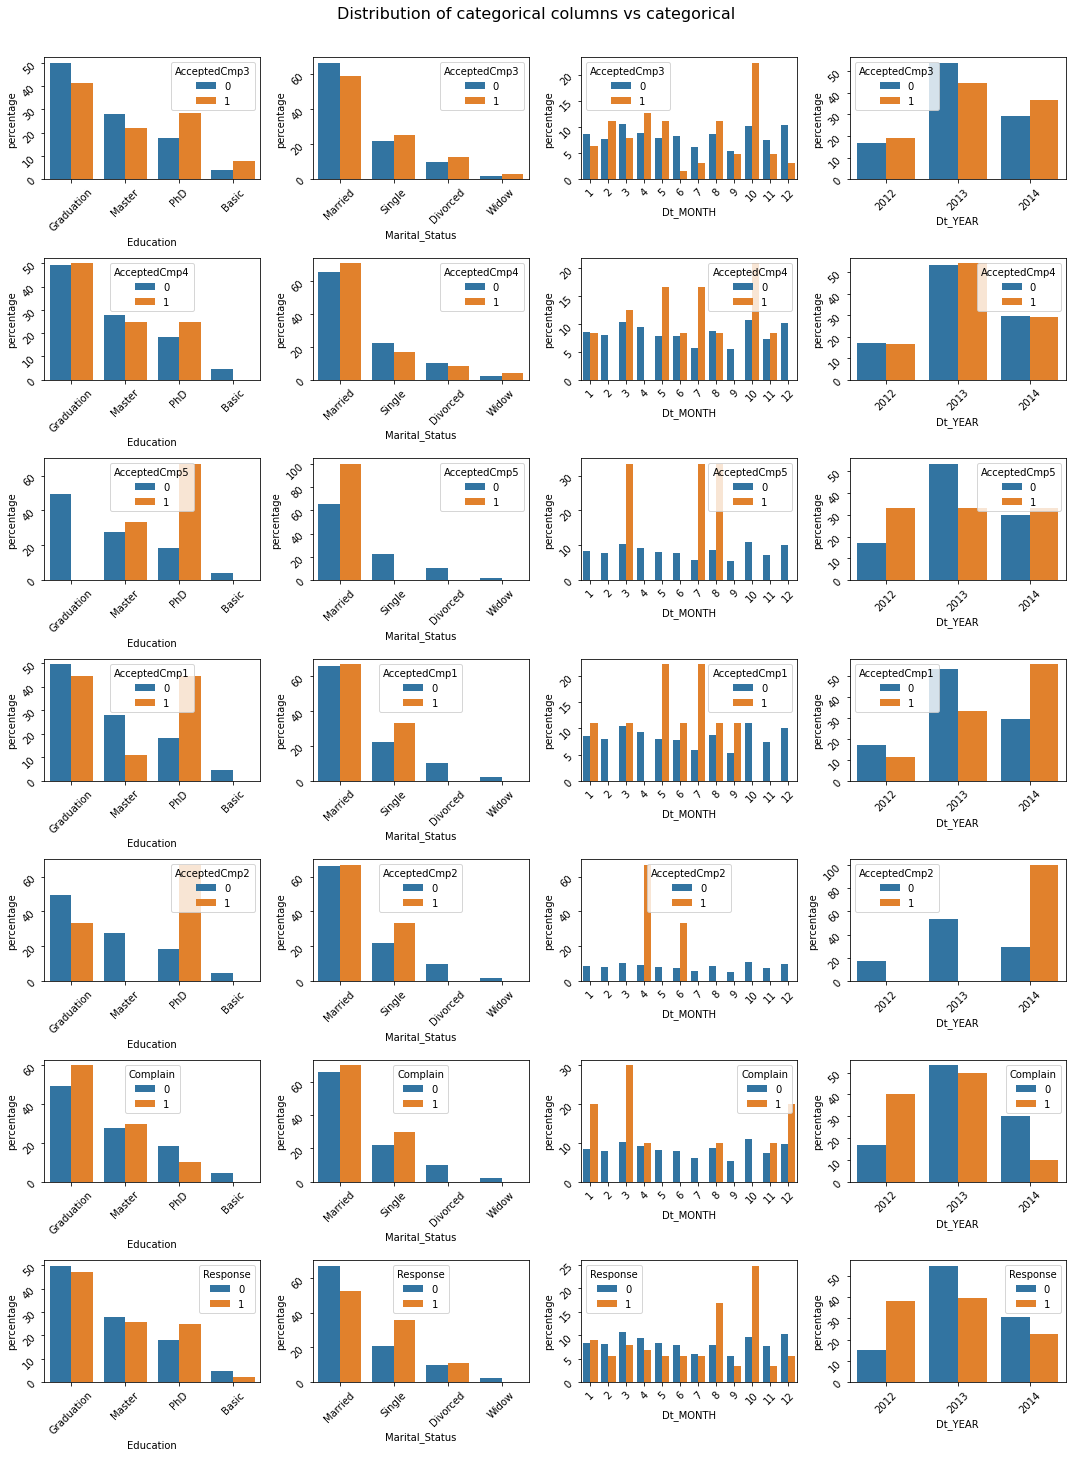

In [33]:
fig, axes = plt.subplots(7, 4, figsize=(15, 20))
for i, column in enumerate(column_cat):
    for j, insight in enumerate(categories_for_insight):
        temp_df = df.groupby([insight])[column].value_counts(normalize=True).mul(100).rename('percentage').reset_index()
        sns.barplot(ax=axes[j][i], data=temp_df, x=column, y='percentage', hue=insight)
        axes[j][i].tick_params(rotation=45)
fig.suptitle('Distribution of categorical columns vs categorical', fontsize=16, y=1.01)
plt.tight_layout()
plt.show()

## More Feature Engineering

### Education Column

In [34]:
ohe = OneHotEncoder()
edu = pd.DataFrame(df['Education'])
ohe_edu = ohe.fit_transform(edu)

In [35]:
df_edu = pd.DataFrame(ohe_edu.toarray().astype(int), columns=ohe.categories_[0], dtype=int)
df_edu

,Basic,Graduation,Master,PhD
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,0,0,1
4,1,0,0,0
...,...,...,...,...
1022,0,1,0,0
1023,0,1,0,0
1024,0,1,0,0
1025,0,1,0,0


In [36]:
df = pd.concat([df.reset_index(drop=True), df_edu], axis=1)

### Marital Status column

In [37]:
ohe_marital = OneHotEncoder()
status = pd.DataFrame(df['Marital_Status'])
ohe_status = ohe_marital.fit_transform(status)

In [38]:
df_status = pd.DataFrame(ohe_status.toarray().astype(int), columns=ohe_marital.categories_[0], dtype=int)
df_status

,Divorced,Married,Single,Widow
0,0,0,1,0
1,0,1,0,0
2,1,0,0,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
1022,0,0,1,0
1023,0,1,0,0
1024,0,0,1,0
1025,0,1,0,0


In [39]:
df = pd.concat([df.reset_index(drop=True), df_status], axis=1)

In [40]:
df.drop(columns=['Education', 'Basic', 'Marital_Status', 'Widow'], inplace=True)

In [41]:
df.drop(columns=['Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

In [42]:
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,age,Dt_MONTH,Dt_YEAR,Graduation,Master,PhD,Divorced,Married,Single
0,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,63,8,2014,1,0,0,0,0,1
1,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,33,10,2014,1,0,0,0,1,0
2,55635.0,0,1,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,0,46,11,2012,1,0,0,1,0,0
3,33454.0,1,0,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,0,32,8,2013,0,0,1,0,1,0
4,7500.0,0,0,59,6,16,11,11,1,16,1,2,0,3,8,0,0,0,0,0,0,0,41,11,2012,0,0,0,0,1,0


## Split dataset

In [43]:
X = df.drop(columns='Income')
y = df['Income']

In [44]:
print(X.shape, y.shape)

(1027, 30) (1027,)


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [46]:
print(X_train.shape, y_train.shape)

(688, 30) (688,)


In [47]:
print(X_test.shape, y_test.shape)

(339, 30) (339,)


## Correlation

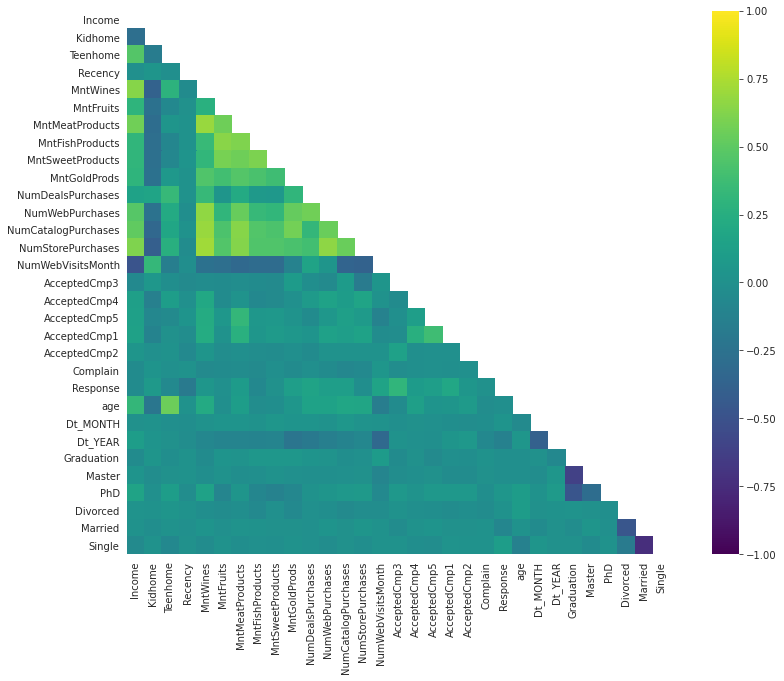

In [48]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 10))
    ax = sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, square=True, cmap="viridis")

## Check correlation with Incame

In [49]:
corr['Income'].sort_values()

NumWebVisitsMonth     -0.483009
Kidhome               -0.279784
AcceptedCmp3          -0.058970
Single                -0.046930
Graduation            -0.041535
Complain              -0.041126
Response              -0.040540
Recency               -0.006952
Dt_MONTH               0.005510
Married                0.012929
Divorced               0.025879
Master                 0.035703
AcceptedCmp2           0.043648
Dt_YEAR                0.106502
AcceptedCmp4           0.120820
AcceptedCmp5           0.129335
AcceptedCmp1           0.143733
NumDealsPurchases      0.154257
PhD                    0.162880
MntFruits              0.298111
MntGoldProds           0.303712
MntFishProducts        0.307167
MntSweetProducts       0.308249
age                    0.324642
Teenhome               0.465126
NumWebPurchases        0.475456
NumCatalogPurchases    0.513550
MntMeatProducts        0.566300
NumStorePurchases      0.610248
MntWines               0.639697
Income                 1.000000
Name: In

## Check Linearity

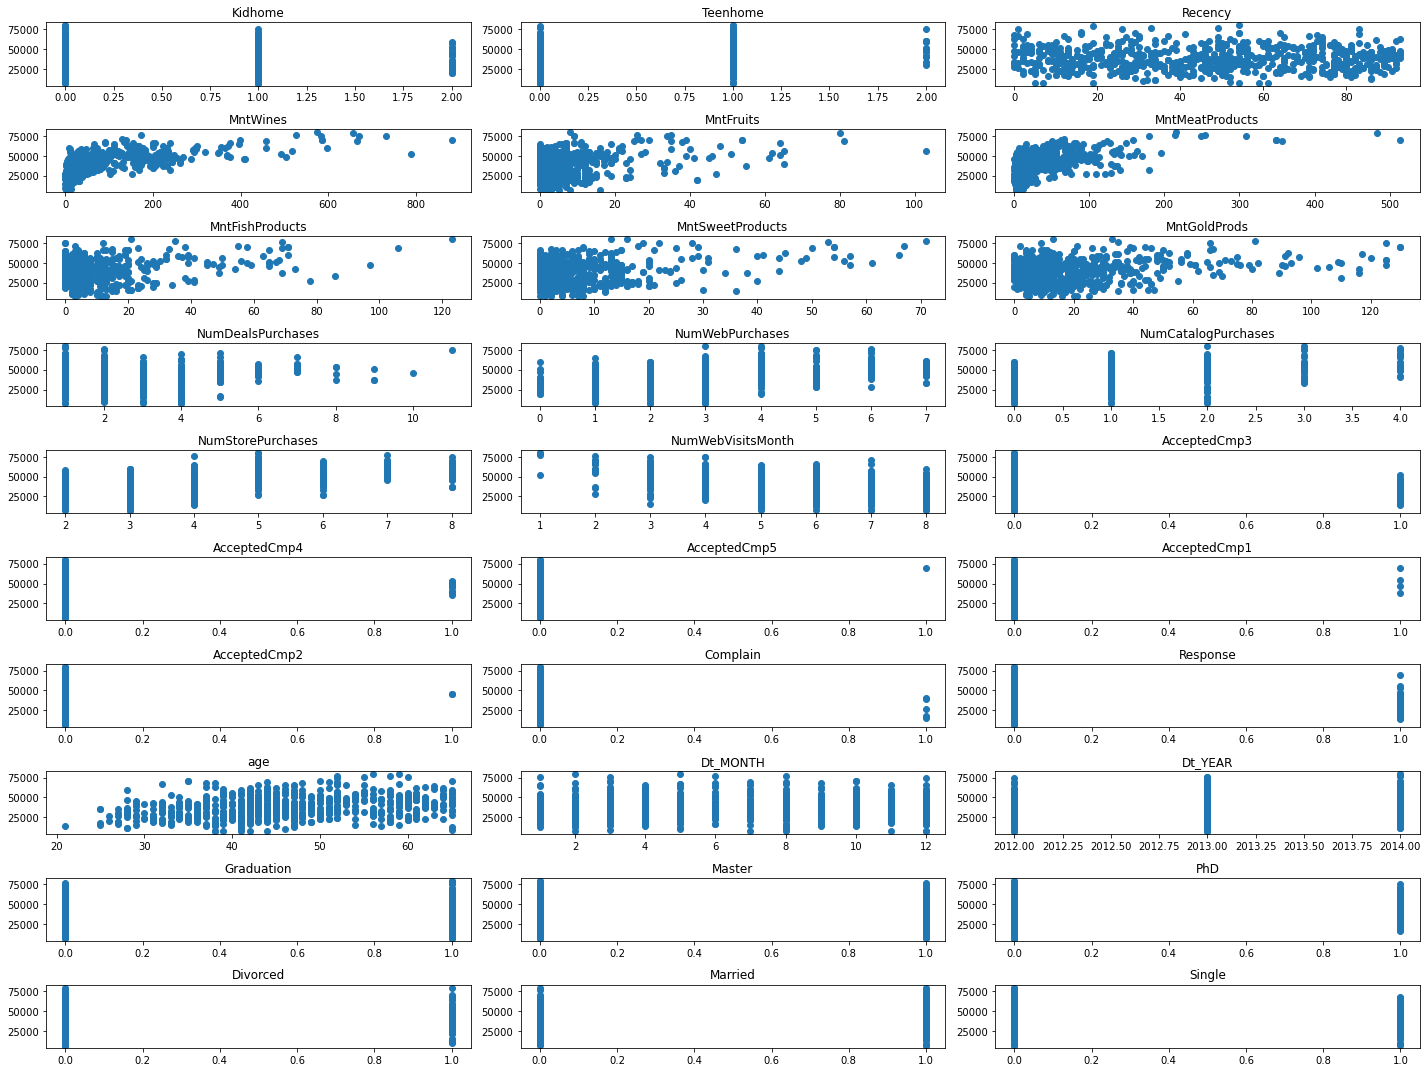

In [50]:
# Loop over the columns and plot the relationship between each column and the target
plt.subplots(10,3, figsize=(20,15))

count = 1

for col in X_train.columns:
    plt.subplot(10,3,count)
    plt.scatter(X_train[col],y_train)
    plt.title(col)
    
    count += 1
    
plt.tight_layout()
plt.show()

## Check Multicollinearity

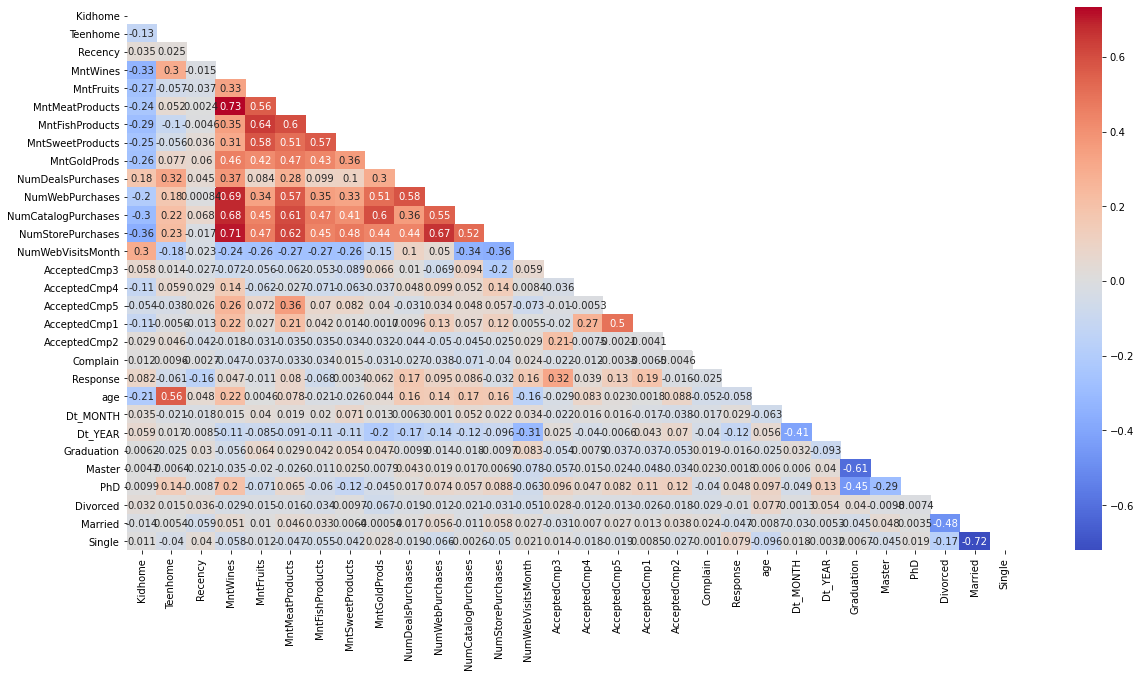

In [51]:
# Correlation between independent variables
X_corr = X_train.corr()
plt.figure(figsize=(20,10))
matrix = np.triu(X_train.corr())
sns.heatmap(X_train.corr(), annot=True, mask=matrix, cmap='coolwarm')
plt.show()

## Check Variance Inflation Factor

In [52]:
# Calculate VIF

pd.Series([variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])], index=X_train.columns)

Kidhome                  5.014190
Teenhome                 3.823471
Recency                  4.241241
MntWines                 7.532789
MntFruits                2.959139
MntMeatProducts          6.187184
MntFishProducts          3.422563
MntSweetProducts         2.744482
MntGoldProds             3.258443
NumDealsPurchases        7.514126
NumWebPurchases         12.083686
NumCatalogPurchases      5.459058
NumStorePurchases       28.030282
NumWebVisitsMonth       28.018251
AcceptedCmp3             1.438358
AcceptedCmp4             1.235278
AcceptedCmp5             1.757035
AcceptedCmp1             1.580465
AcceptedCmp2             1.100516
Complain                 1.026541
Response                 1.464759
age                     36.952533
Dt_MONTH                 4.520346
Dt_YEAR                161.406521
Graduation              11.389915
Master                   7.027058
PhD                      5.159743
Divorced                 5.719930
Married                 31.621672
Single        

In [53]:
X_train.drop(columns=['Dt_YEAR', 'MntMeatProducts', 'NumStorePurchases', 'NumWebVisitsMonth', 'Married', 'age'], inplace=True)
X_test.drop(columns=['Dt_YEAR', 'MntMeatProducts', 'NumStorePurchases', 'NumWebVisitsMonth', 'Married', 'age'], inplace=True)

In [54]:
pd.Series([variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])], index=X_train.columns)

Kidhome                4.269823
Teenhome               2.775163
Recency                3.899301
MntWines               4.999013
MntFruits              2.748252
MntFishProducts        2.996080
MntSweetProducts       2.503528
MntGoldProds           3.230724
NumDealsPurchases      6.612104
NumWebPurchases        9.892108
NumCatalogPurchases    4.791603
AcceptedCmp3           1.371526
AcceptedCmp4           1.192263
AcceptedCmp5           1.574358
AcceptedCmp1           1.570705
AcceptedCmp2           1.082535
Complain               1.021164
Response               1.434545
Dt_MONTH               3.989943
Graduation             5.660720
Master                 3.607881
PhD                    2.945809
Divorced               1.170081
Single                 1.317516
dtype: float64

## Modeling

In [55]:
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

In [56]:
X_train.head()

,const,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Dt_MONTH,Graduation,Master,PhD,Divorced,Single
564,1.0,0,1,64,318,3,4,7,56,5,4,1,0,0,0,0,0,0,0,8,0,1,0,0,0
673,1.0,1,0,46,56,10,19,7,25,3,3,2,0,0,0,0,0,0,0,2,1,0,0,0,0
39,1.0,0,1,0,53,1,2,1,10,2,2,0,0,0,0,0,0,0,0,7,0,1,0,0,1
525,1.0,1,0,76,1,5,4,8,20,2,2,1,0,0,0,0,0,0,0,11,0,1,0,1,0
568,1.0,0,1,15,27,5,8,3,12,3,3,0,0,0,0,0,0,0,0,9,1,0,0,1,0


In [57]:
lin_reg_model_base = linear_model.OLS(y_train, X_train).fit()

In [58]:
lin_reg_model_base.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Income   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     43.44
Date:                Mon, 14 Feb 2022   Prob (F-statistic):          6.78e-119
Time:                        21:05:25   Log-Likelihood:                -7211.4
No. Observations:                 688   AIC:                         1.447e+04
Df Residuals:                     663   BIC:                         1.459e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.667e+04   1861.063      8.960      0.000     1.3e+04    2.03e+04
Kidhome              3206.8851    800.986      4.004      0.000    1634.111    4779.659
Teenhome             9984.6174    736.124     13.564      0.000    8539.203    1.14e+04
Recency                -2.4914     13.023     -0.191      0.848     -28.063      23.080
MntWines               47.1393      5.284      8.921      0.000      36.764      57.515
MntFruits              70.0439     41.052      1.706      0.088     -10.563     150.651
MntFishProducts        31.1047     32.003      0.972      0.331     -31.734      93.944
MntSweetProducts      145.1368     43.207      3.359      0.001      60.297     229.976
MntGoldProds            2.1545     19.871      0.108      0.914     -36.862      41.171
NumDealsPurchases   -2254.7318    308.331     -7.313      0.000   -2860.155   -1649.309
NumWebPurchases      1515.0033    354.962      4.268      0.000     818.019    2211.987
NumCatalogPurchases   804.7736    591.529      1.360      0.174    -356.722    1966.269
AcceptedCmp3        -2604.7626   1562.089     -1.667      0.096   -5671.999     462.474
AcceptedCmp4         2169.1243   2663.514      0.814      0.416   -3060.815    7399.064
AcceptedCmp5        -6581.5046    1.1e+04     -0.597      0.551   -2.82e+04    1.51e+04
AcceptedCmp1        -3580.1850   5509.041     -0.650      0.516   -1.44e+04    7237.084
AcceptedCmp2         6453.8640   6466.515      0.998      0.319   -6243.452    1.92e+04
Complain            -7362.3808   3972.333     -1.853      0.064   -1.52e+04     437.489
Response            -2023.9233   1432.793     -1.413      0.158   -4837.282     789.435
Dt_MONTH              -41.7083     95.388     -0.437      0.662    -229.006     145.590
Graduation           8954.9996   1595.057      5.614      0.000    5823.027    1.21e+04
Master               1.034e+04   1653.485      6.253      0.000    7092.439    1.36e+04
PhD                  1.146e+04   1782.445      6.432      0.000    7964.847     1.5e+04
Divorced             1439.3306   1128.662      1.275      0.203    -776.851    3655.512
Single                210.1334    856.501      0.245      0.806   -1471.648    1891.914
==============================================================================
Omnibus:                        2.697   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.260   Jarque-Bera (JB):                2.526
Skew:                          -0.139   Prob(JB):                        0.283
Kurtosis:                       3.103   Cond. No.                     5.01e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.01e+03. 

In [59]:
X_train.drop(columns=['Recency', 'MntGoldProds', 'AcceptedCmp1', 'AcceptedCmp1', 'Response', 'Dt_MONTH', 'Single'], inplace=True)
X_test.drop(columns=['Recency', 'MntGoldProds', 'AcceptedCmp1', 'AcceptedCmp1', 'Response', 'Dt_MONTH', 'Single'], inplace=True)

In [60]:
X_train.head()

,const,Kidhome,Teenhome,MntWines,MntFruits,MntFishProducts,MntSweetProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp2,Complain,Graduation,Master,PhD,Divorced
564,1.0,0,1,318,3,4,7,5,4,1,0,0,0,0,0,0,1,0,0
673,1.0,1,0,56,10,19,7,3,3,2,0,0,0,0,0,1,0,0,0
39,1.0,0,1,53,1,2,1,2,2,0,0,0,0,0,0,0,1,0,0
525,1.0,1,0,1,5,4,8,2,2,1,0,0,0,0,0,0,1,0,1
568,1.0,0,1,27,5,8,3,3,3,0,0,0,0,0,0,1,0,0,1


In [61]:
lin_reg_model_1 = linear_model.OLS(y_train, X_train).fit()

In [62]:
lin_reg_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Income   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     58.01
Date:                Mon, 14 Feb 2022   Prob (F-statistic):          2.06e-123
Time:                        21:05:25   Log-Likelihood:                -7213.0
No. Observations:                 688   AIC:                         1.446e+04
Df Residuals:                     669   BIC:                         1.455e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.653e+04   1651.819     10.006      0.000    1.33e+04    1.98e+04
Kidhome              3186.0958    791.978      4.023      0.000    1631.035    4741.157
Teenhome             1.013e+04    726.458     13.946      0.000    8704.602    1.16e+04
MntWines               47.4299      5.239      9.053      0.000      37.142      57.718
MntFruits              70.3505     40.666      1.730      0.084      -9.498     150.199
MntFishProducts        36.5948     31.476      1.163      0.245     -25.209      98.399
MntSweetProducts      141.6255     42.835      3.306      0.001      57.518     225.733
NumDealsPurchases   -2306.5546    303.731     -7.594      0.000   -2902.936   -1710.173
NumWebPurchases      1482.5923    344.889      4.299      0.000     805.397    2159.787
NumCatalogPurchases   787.9251    556.644      1.415      0.157    -305.054    1880.904
AcceptedCmp3        -3312.6486   1464.659     -2.262      0.024   -6188.530    -436.767
AcceptedCmp4         1405.1092   2529.747      0.555      0.579   -3562.091    6372.309
AcceptedCmp5        -1.236e+04   9531.158     -1.297      0.195   -3.11e+04    6350.008
AcceptedCmp2         7269.3155   6422.217      1.132      0.258   -5340.812    1.99e+04
Complain            -7246.5473   3961.897     -1.829      0.068    -1.5e+04     532.703
Graduation           8780.2446   1586.207      5.535      0.000    5665.701    1.19e+04
Master               1.017e+04   1642.486      6.192      0.000    6945.595    1.34e+04
PhD                  1.123e+04   1768.008      6.354      0.000    7762.881    1.47e+04
Divorced             1430.8418   1105.999      1.294      0.196    -740.805    3602.488
==============================================================================
Omnibus:                        2.793   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.247   Jarque-Bera (JB):                2.628
Skew:                          -0.144   Prob(JB):                        0.269
Kurtosis:                       3.094   Cond. No.                     4.08e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.08e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [63]:
X_train.drop(columns=['MntFruits', 'AcceptedCmp2', 'AcceptedCmp4', 'Complain', 'Divorced'], inplace=True)
X_test.drop(columns=['MntFruits', 'AcceptedCmp2', 'AcceptedCmp4', 'Complain', 'Divorced'], inplace=True)

In [64]:
lin_reg_model_2 = linear_model.OLS(y_train, X_train).fit()

In [65]:
lin_reg_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Income   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.596
Method:                 Least Squares   F-statistic:                     79.01
Date:                Mon, 14 Feb 2022   Prob (F-statistic):          5.89e-126
Time:                        21:05:25   Log-Likelihood:                -7218.0
No. Observations:                 688   AIC:                         1.446e+04
Df Residuals:                     674   BIC:                         1.453e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.663e+04   1653.416     10.059      0.000    1.34e+04    1.99e+04
Kidhome              3163.0093    789.480      4.006      0.000    1612.874    4713.144
Teenhome             1.012e+04    726.837     13.927      0.000    8695.209    1.15e+04
MntWines               47.6000      5.224      9.112      0.000      37.344      57.857
MntFishProducts        56.6029     29.000      1.952      0.051      -0.338     113.543
MntSweetProducts      161.4090     40.944      3.942      0.000      81.016     241.802
NumDealsPurchases   -2360.6955    303.616     -7.775      0.000   -2956.843   -1764.548
NumWebPurchases      1537.9098    344.930      4.459      0.000     860.643    2215.176
NumCatalogPurchases   918.7530    550.874      1.668      0.096    -162.883    2000.389
AcceptedCmp3        -2974.2819   1435.496     -2.072      0.039   -5792.863    -155.701
AcceptedCmp5        -1.248e+04   9551.840     -1.306      0.192   -3.12e+04    6276.686
Graduation           8859.0921   1587.858      5.579      0.000    5741.350     1.2e+04
Master               1.015e+04   1644.766      6.173      0.000    6923.625    1.34e+04
PhD                  1.137e+04   1768.527      6.430      0.000    7899.650    1.48e+04
==============================================================================
Omnibus:                        2.804   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.246   Jarque-Bera (JB):                2.631
Skew:                          -0.142   Prob(JB):                        0.268
Kurtosis:                       3.106   Cond. No.                     4.07e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.07e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

###### **Model Assessment with R<sup>2<sup/>** <br>
    
| Model   | R<sup>2<sup/>   | 
|-------------|-------|
| Model base| 0.628 |
| Model 1 | 0.626 |
| Model 2 | 0.623 |

### Expectation (mean) of residuals is zero

In [66]:
lin_reg_model_2.resid.mean()

3.040038918274953e-10

## Making predictions, RMSE and R2

In [67]:
ypred_train = lin_reg_model_2.predict(X_train)
ypred_test = lin_reg_model_2.predict(X_test)

In [68]:
print(f'The Root Mean Squared Error for the train set is {rmse(y_train, ypred_train)}')

The Root Mean Squared Error for the train set is 8711.19836033025


In [69]:
print(f'The Root Mean Squared Error for the test set is {rmse(y_test, ypred_test)}')

The Root Mean Squared Error for the test set is 8874.387908916597


In [70]:
print(f'The coefficient of determination R2 for the train set is {r2_score(y_train, ypred_train)}')

The coefficient of determination R2 for the train set is 0.6037787666582337


In [71]:
print(f'The coefficient of determination R2 for the test set is {r2_score(y_test, ypred_test)}')

The coefficient of determination R2 for the test set is 0.5971817452571262


## Model diagnosis

### Linearity of the model

In [72]:
fitted_vals = lin_reg_model_2.predict(X_train)
resids = lin_reg_model_2.resid

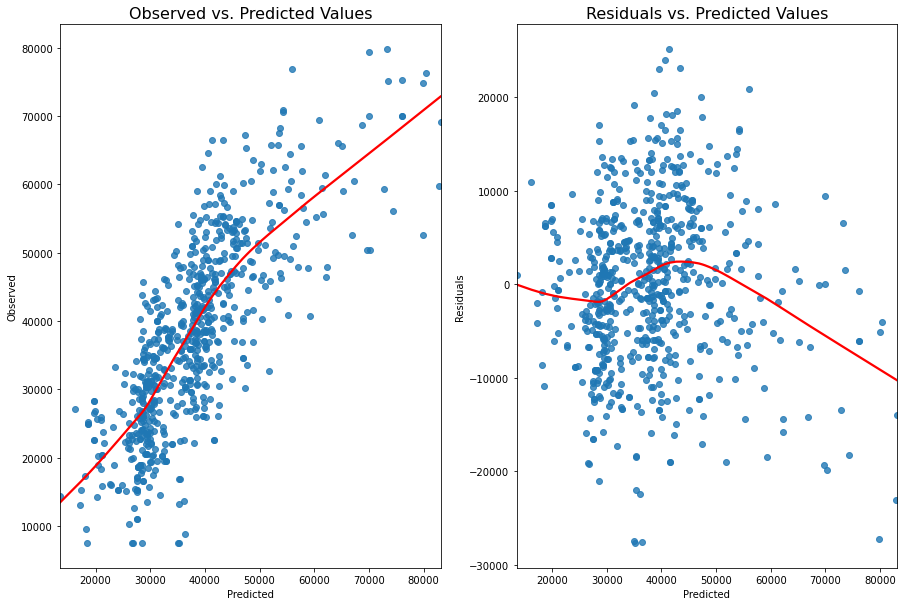

In [73]:
fig, ax = plt.subplots(1,2, figsize=(15, 10))
sns.regplot(x=fitted_vals, y=y_train, lowess=True, ax=ax[0], line_kws={'color': 'red'})
ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
ax[0].set(xlabel='Predicted', ylabel='Observed')

sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
ax[1].set(xlabel='Predicted', ylabel='Residuals')
plt.show()

### Residuals 
- A residual plot can help to visualize whether the error in the model is random or non-random 
- The distribution of the residual values should appear to be normally distributed

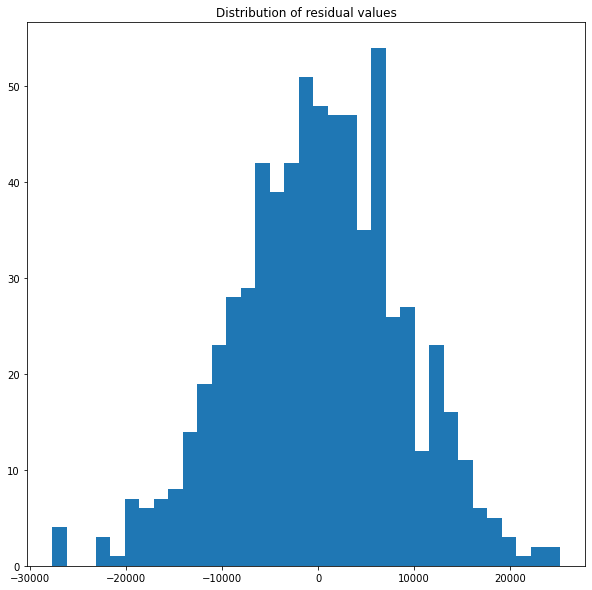

In [74]:
# Plotting the residuals of the model 2
plt.figure(figsize=(10,10))
plt.hist(lin_reg_model_2.resid, bins = 35)
plt.title('Distribution of residual values')
plt.show()

In [75]:
# calculating the shapiro test statisic and its p-value

print("Shapiro-Wilk Test: ", stats.shapiro(lin_reg_model_2.resid))

Shapiro-Wilk Test:  ShapiroResult(statistic=0.9974974393844604, pvalue=0.38828644156455994)


The null hypothesis for the Shapiro-Wilk test is that the data is normally distributed. 
Because the p-value is more than 0.05, then the null hypothesis that the data are normally distributed cannot be rejected.
WE CANNOT SAY THAT THE DATA IS NORMALLY DISTRIBUTED though.

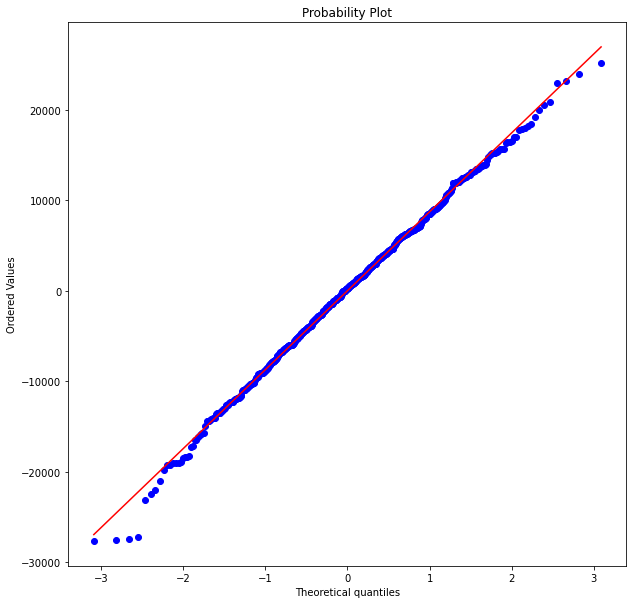

In [76]:
# Normal Q-Q plot

plt.figure(figsize=(10,10))
stats.probplot(lin_reg_model_2.resid, dist="norm", plot = plt);
plt.show()

### Homoscedasticity

The variance of residual is the same .

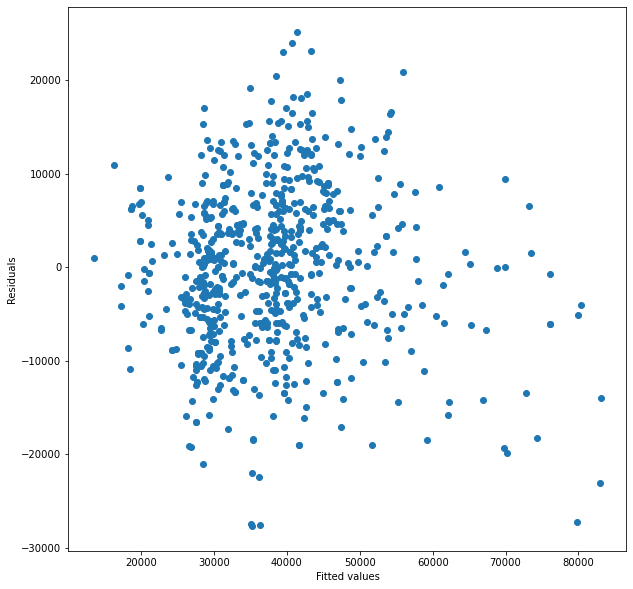

In [77]:
# Plot the residuals and the predicted values
plt.figure(figsize=(10,10))
plt.scatter(lin_reg_model_2.fittedvalues, lin_reg_model_2.resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

# Logistic Regression

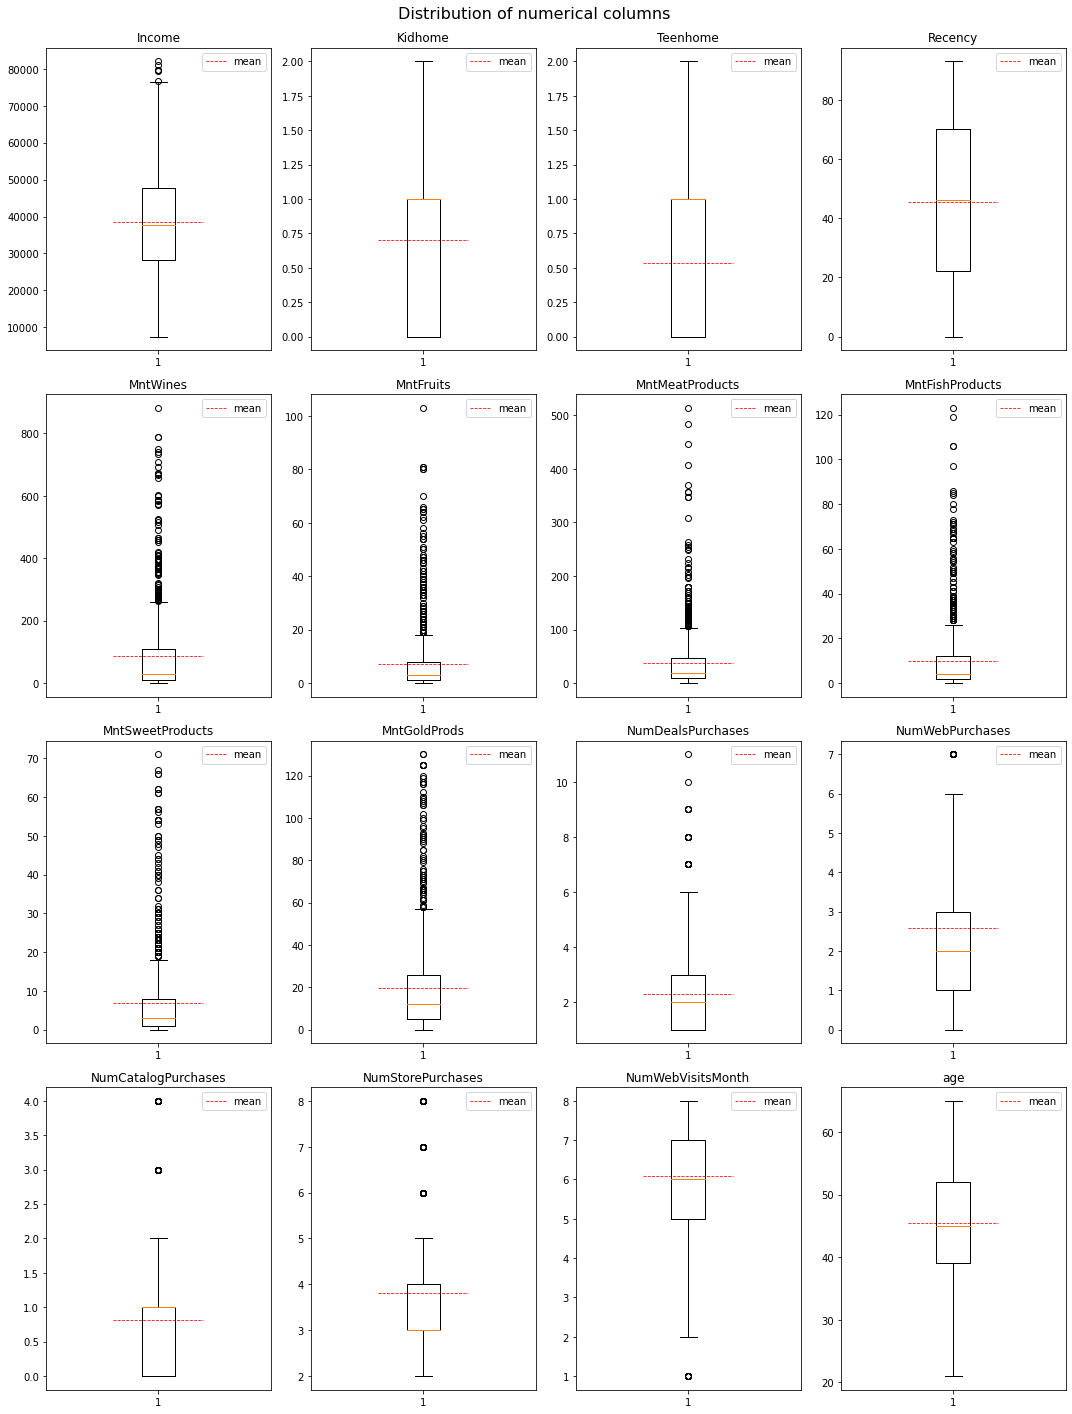

In [78]:
fig, axes = plt.subplots(4, 4, figsize=(15, 20))
axes = axes.flatten()
for idx, column in enumerate(list_to_plot):
    axes[idx].boxplot(df[column])
    axes[idx].hlines(y=df[column].mean(), xmin=0.8, xmax=1.2, color='r', linestyle='dashed', linewidth=0.8, label='mean')
    axes[idx].set_title(column)
    axes[idx].legend()
fig.suptitle('Distribution of numerical columns \n', fontsize=16)
plt.tight_layout()
plt.show()

In [79]:
balance = df['Response'].value_counts(normalize=True).mul(100).reset_index()

In [80]:
balance

,index,Response
0,0,91.333982
1,1,8.666018


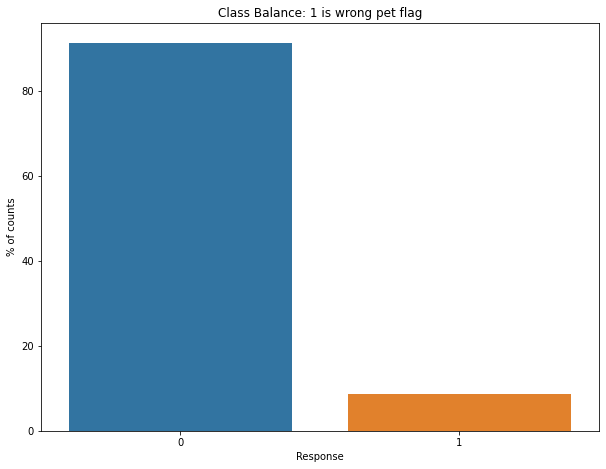

In [82]:
plt.figure(figsize=(10, 7.5))
sns.barplot(data=balance, x='index', y='Response')
plt.title('Class Balance: 1 is wrong pet flag')
plt.xlabel('Response')
plt.ylabel('% of counts')
plt.show()

In [43]:
X = df.drop(columns='Income')
y = df['Income']

In [44]:
print(X.shape, y.shape)

(1027, 30) (1027,)


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [46]:
print(X_train.shape, y_train.shape)

(688, 30) (688,)


In [47]:
print(X_test.shape, y_test.shape)

(339, 30) (339,)
